In [31]:
#Import the necessary libraries then load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [32]:
X, y = load_iris(return_X_y=True)

In [33]:
#Test the values of K
k_values = range(1,31)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    mean_scores.append(scores.mean())

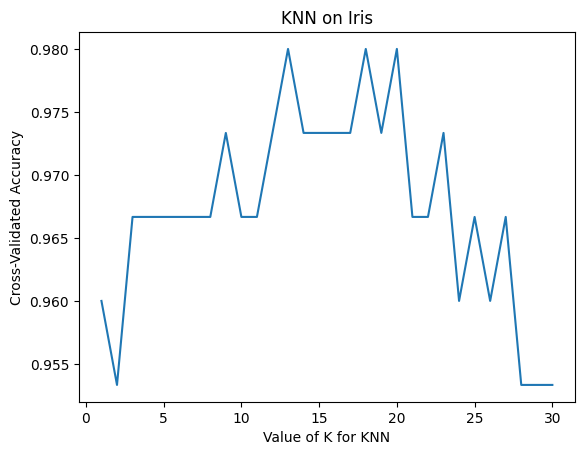

In [34]:
#Plot All K Values
plt.plot(k_values, mean_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN on Iris")
plt.show()

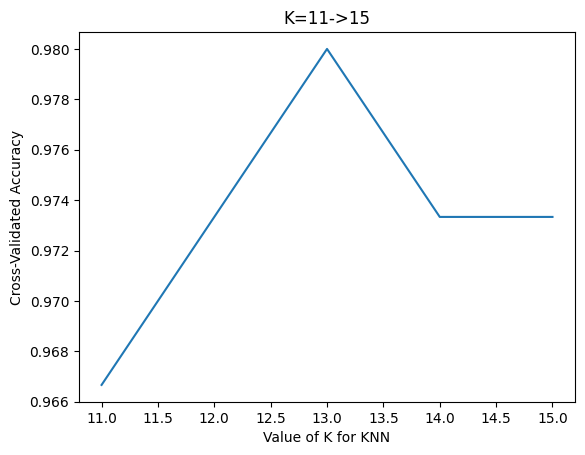

In [35]:
#Plot K11 to K15 on a zoomed scale
plt.plot(k_values[10:15], mean_scores[10:15])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K=11->15')
plt.show()

In [36]:
#Find the omptimal K value
best_k = k_values[np.argmax(mean_scores)]
best_score = np.max(mean_scores)
print(f"Optimal value of K: {best_k}")

Optimal value of K: 13


In [37]:
#Confirm the value using GridSearchCV
param_grid = {'n_neighbors': k_values}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
print(f"Optimal value of K from GridSearchCV: {grid.best_params_['n_neighbors']}")

Optimal value of K from GridSearchCV: 13
